In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ct_data/ACSDP5YSPT2010.DP03-Data.csv",skiprows=[1])

/var/folders/62/95svt93s3wg7w60_g2mj5w2c0000gn/T/ipykernel_98862/1863008640.py:1: DtypeWarning: Columns (70,71,72,73,86,87,88,89,94,95,96,97,102,103,104,105,118,119,120,121,134,135,136,137,150,151,152,153,158,159,160,161,166,167,168,169,174,175,176,177,182,183,184,185,190,191,192,193,194,195,196,197,214,215,216,217,222,223,224,225,230,231,232,233,238,239,240,241,246,247,248,249,262,263,264,265,270,271,272,273,278,279,280,281,286,287,288,289,294,295,296,297,302,303,304,305,310,311,312,313,318,319,320,321,326,327,328,329,334,335,336,337,342,343,344,345,350,351,352,353,358,359,360,361,374,375,376,377,382,383,384,385,390,391,392,393,398,399,400,401,414,415,416,417,422,423,424,425,430,431,432,433,438,439,440,441,446,447,448,449,454,455,456,457,462,463,464,465,470,471,472,473,478,479,480,481,486,487,488,489,490,491,492,493,498,499,500,501,510,511,512,513,514,515,516,517,526,527,528,529,530,531,532,533,542,543,544,545,546,547,548,549,558,559,560,561,574,575,576,577,590,591,592,593,606,607,608

In [3]:
col_names = pd.Series(df.columns)
useful_idx = ["GEO_ID"]
useful_idx.extend(col_names[col_names.apply(lambda x: x[-1]=="E")])
for metric in useful_idx:
    if df[metric][0] == '(X)' and len(np.unique(df[metric])) == 1:
        useful_idx.remove(metric)

In [4]:
useful_idx

['GEO_ID',
 'NAME',
 'DP03_0001E',
 'DP03_0001PE',
 'DP03_0002E',
 'DP03_0002PE',
 'DP03_0003E',
 'DP03_0003PE',
 'DP03_0004E',
 'DP03_0004PE',
 'DP03_0005E',
 'DP03_0005PE',
 'DP03_0006E',
 'DP03_0006PE',
 'DP03_0007E',
 'DP03_0007PE',
 'DP03_0008E',
 'DP03_0008PE',
 'DP03_0009PE',
 'DP03_0010E',
 'DP03_0010PE',
 'DP03_0011E',
 'DP03_0011PE',
 'DP03_0012E',
 'DP03_0012PE',
 'DP03_0013E',
 'DP03_0013PE',
 'DP03_0014E',
 'DP03_0014PE',
 'DP03_0015E',
 'DP03_0015PE',
 'DP03_0016E',
 'DP03_0016PE',
 'DP03_0017E',
 'DP03_0017PE',
 'DP03_0018E',
 'DP03_0018PE',
 'DP03_0019E',
 'DP03_0019PE',
 'DP03_0020E',
 'DP03_0020PE',
 'DP03_0021E',
 'DP03_0021PE',
 'DP03_0022E',
 'DP03_0022PE',
 'DP03_0023E',
 'DP03_0023PE',
 'DP03_0024E',
 'DP03_0024PE',
 'DP03_0025E',
 'DP03_0026E',
 'DP03_0026PE',
 'DP03_0027E',
 'DP03_0027PE',
 'DP03_0028E',
 'DP03_0028PE',
 'DP03_0029E',
 'DP03_0029PE',
 'DP03_0030E',
 'DP03_0030PE',
 'DP03_0031E',
 'DP03_0031PE',
 'DP03_0032E',
 'DP03_0032PE',
 'DP03_0033E',
 'DP

In [5]:
df = df[useful_idx]

In [6]:
df["GEO_ID"] = df["GEO_ID"].apply(lambda x:x[-11:])

/var/folders/62/95svt93s3wg7w60_g2mj5w2c0000gn/T/ipykernel_98862/2625222708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GEO_ID"] = df["GEO_ID"].apply(lambda x:x[-11:])


In [7]:
df

,GEO_ID,NAME,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,3.6,4.2,4.2,2.1,4.8,3.5,5.3,0.0,2.4,12.2
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,12.7,18.1,17.6,11.4,19.7,11.4,12.7,7.1,9.2,27.6
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,13.8,33.2,30.6,23.1,32.5,10.4,12.7,4.9,12.2,20.6
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,18.3,26.4,26.4,42.4,18.1,16.3,18.8,9.4,14.3,30.4
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,9.4,13.3,13.3,50.0,8.3,8.7,10.0,6.3,5.8,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,5.1,1.5,1.5,0.0,1.9,5.9,3.5,12.0,1.6,17.3
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,7.6,13.8,12.0,4.6,14.2,5.7,5.7,5.8,6.5,11.9
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,1.1,1.5,0.0,0.0,0.0,0.9,0.8,1.8,0.0,10.3
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,3.8,0.9,0.9,0.0,1.1,4.7,3.1,11.3,2.9,10.5


In [8]:
geo = gpd.read_file("zip://ct_data/tl_2019_55_tract.zip")

<AxesSubplot:>

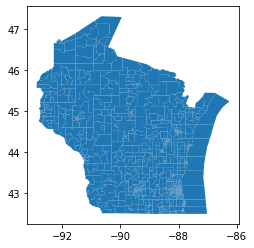

In [9]:
geo.plot()

In [10]:
joined = gpd.GeoDataFrame(pd.merge(df,geo,how="left",left_on="GEO_ID",right_on = "GEOID"))

In [11]:
joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


<AxesSubplot:>

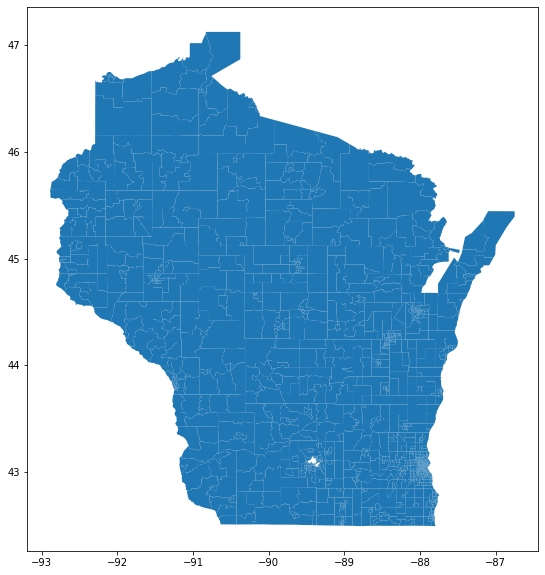

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
joined[joined["geometry"].notnull()].plot(ax=ax)

In [13]:
joined[joined["geometry"].isnull()]

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry


In [15]:
joined2 = pd.merge(geo,df,how="left",left_on="GEOID",right_on = "GEO_ID")

<AxesSubplot:>

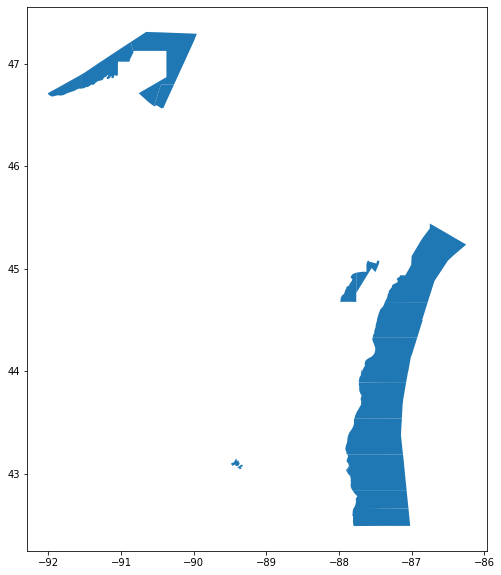

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
joined2[joined2["DP03_0133PE"].isnull()].plot(ax=ax)

In [17]:
not_joined_attr = joined[(joined["geometry"].isnull())]
not_joined_geo = joined2[(joined2["DP03_0133PE"].isnull())]

In [18]:
not_joined_geo

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
177,55,071,990000,55071990000,9900,Census Tract 9900,G5020,S,0,2300635539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,55,075,990000,55075990000,9900,Census Tract 9900,G5020,S,0,274730121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,55,079,990000,55079990000,9900,Census Tract 9900,G5020,S,0,2428866696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,55,025,991702,55025991702,9917.02,Census Tract 9917.02,G5020,S,0,40013826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,55,029,990000,55029990000,9900,Census Tract 9900,G5020,S,0,3235661755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,55,051,990000,55051990000,9900,Census Tract 9900,G5020,S,0,297907165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,55,007,990000,55007990000,9900,Census Tract 9900,G5020,S,0,1037161438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,55,083,990000,55083990000,9900,Census Tract 9900,G5020,S,0,317559368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,55,031,990000,55031990000,9900,Census Tract 9900,G5020,S,0,355657555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,55,079,980000,55079980000,9800,Census Tract 9800,G5020,S,2024683,4018925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
not_joined_attr

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry


In [24]:
#final joined data
joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."
